In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dados_lamp.csv", header=0)
df2 = pd.read_csv("dados_lamp2.csv", header=0)
df.head()

,WL [nm],Int(Result.Sample 1)
0,300.0,2.9600
1,300.5,3.0878
2,301.0,3.1954
3,301.5,3.3566
4,302.0,3.4109


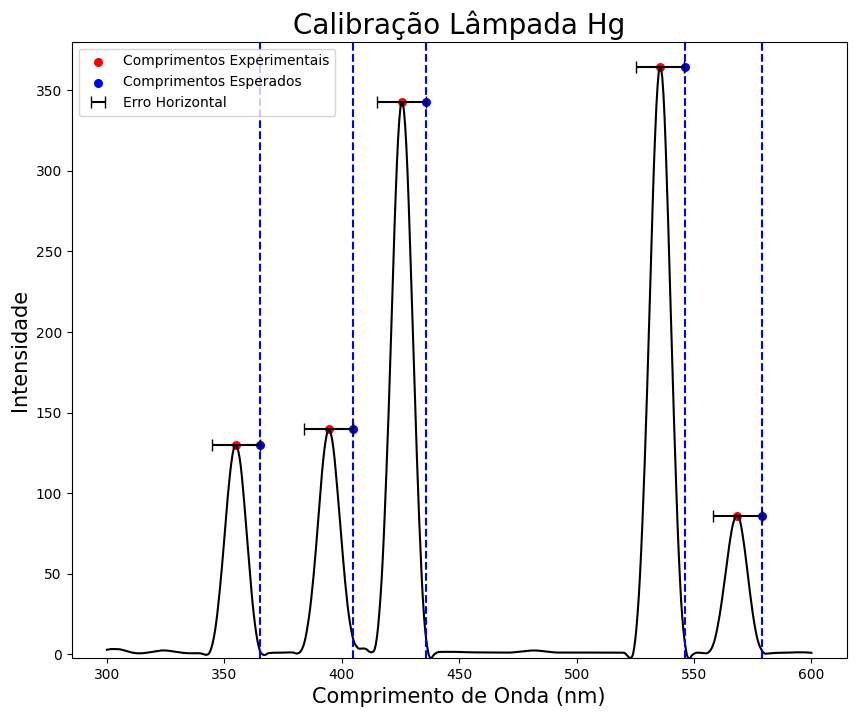

Desvio médio das medidas 10.4 nm


In [3]:
import scipy.signal as signal

x_maximos_lamp_esperados = [365, 405, 436, 546, 579]

maximos_locais, _ = signal.find_peaks(df["Int(Result.Sample 1)"])
subset_maximos = df.loc[maximos_locais, ["WL [nm]", "Int(Result.Sample 1)"]]

for i in subset_maximos.index:
    if subset_maximos.loc[i, "Int(Result.Sample 1)"] < 50:
        subset_maximos = subset_maximos.drop(i, axis=0)

x_maximos_lamp = subset_maximos["WL [nm]"]
y_maximos_lamp = subset_maximos ["Int(Result.Sample 1)"]

desvio = abs(x_maximos_lamp-x_maximos_lamp_esperados)
erro = np.mean(desvio)

plt.figure(figsize=(10,8))
plt.scatter(x=x_maximos_lamp, y=y_maximos_lamp, s=30, c="r", label="Comprimentos Experimentais")

plt.plot(df["WL [nm]"], df["Int(Result.Sample 1)"], c="black" )
plt.axvline(x=365, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=405, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=436, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=546, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=579, ymin=0, ymax=400, linestyle="--", c='b')
plt.errorbar(x_maximos_lamp, y_maximos_lamp, xerr=erro, fmt='none', ecolor='black', capsize=4, label='Erro Horizontal')
plt.scatter(x=x_maximos_lamp_esperados, y=y_maximos_lamp, s=30, c="blue", label="Comprimentos Esperados")
plt.xlabel("Comprimento de Onda (nm)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.title("Calibração Lâmpada Hg", fontsize=20)
plt.ylim((-2,380))
plt.legend()
plt.show()

print(f"Desvio médio das medidas {erro} nm")

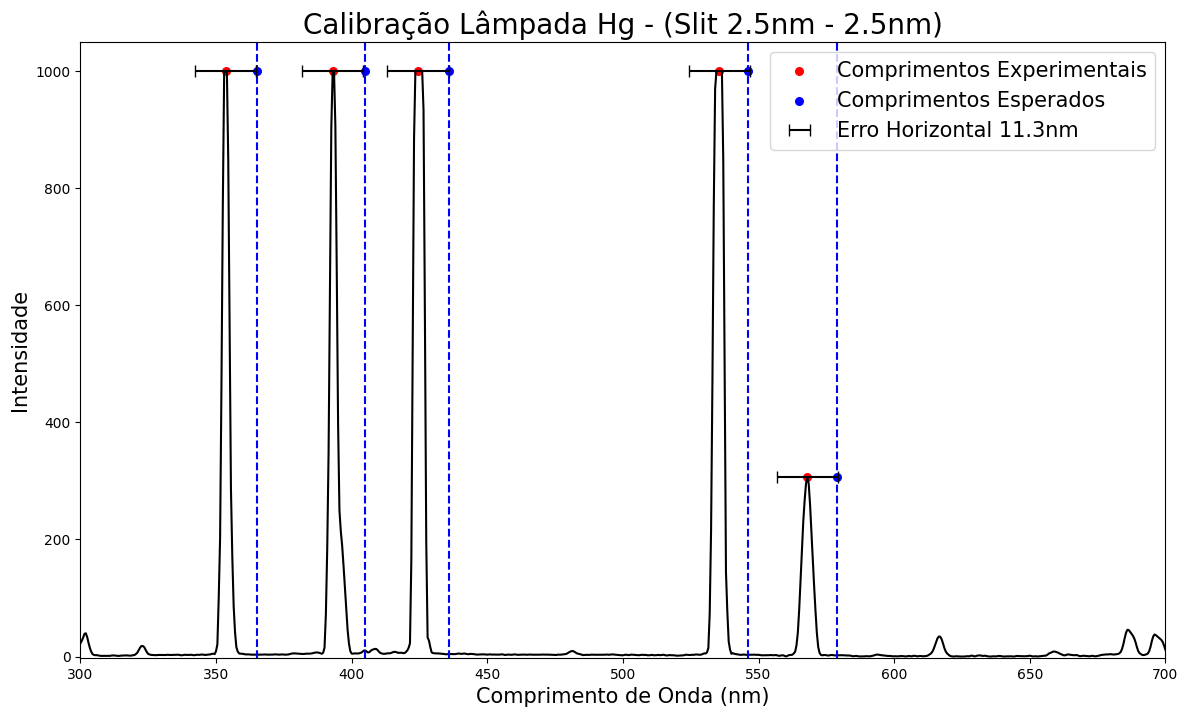

Desvio médio das medidas 11.3 nm


In [4]:
import scipy.signal as signal

x_maximos_lamp_esperados = [365, 405, 436, 546, 579]

maximos_locais, _ = signal.find_peaks(df2["int"])
subset_maximos = df2.loc[maximos_locais, ["comp", "int"]]

for i in subset_maximos.index:
    if subset_maximos.loc[i, "int"] < 50:
        subset_maximos = subset_maximos.drop(i, axis=0)

x_maximos_lamp = subset_maximos["comp"]
y_maximos_lamp = subset_maximos ["int"]

desvio = abs(x_maximos_lamp-x_maximos_lamp_esperados)
erro = np.mean(desvio)

plt.figure(figsize=(14,8))
plt.scatter(x=x_maximos_lamp, y=y_maximos_lamp, s=30, c="r", label="Comprimentos Experimentais")

plt.plot(df2["comp"], df2["int"], c="black" )
plt.axvline(x=365, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=405, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=436, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=546, ymin=0, ymax=400, linestyle="--", c='b')
plt.axvline(x=579, ymin=0, ymax=400, linestyle="--", c='b')
plt.errorbar(x_maximos_lamp, y_maximos_lamp, xerr=erro, fmt='none', ecolor='black', capsize=4, label='Erro Horizontal 11.3nm')
plt.scatter(x=x_maximos_lamp_esperados, y=y_maximos_lamp, s=30, c="blue", label="Comprimentos Esperados")
plt.xlabel("Comprimento de Onda (nm)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.title("Calibração Lâmpada Hg - (Slit 2.5nm - 2.5nm)", fontsize=20)
plt.xlim(300,700)
plt.ylim((-2,1050))
plt.legend(fontsize=15)
plt.grid(False)
plt.show()

print(f"Desvio médio das medidas {erro} nm")

In [5]:
df_fluor = pd.read_csv("/content/dados_resolução_fluorímetro.csv")
df_fluor.head()

,comprimento de onda (nm),(1) 2.5-2.5,(1) 2.5-5,(1) 2.5-10,(2) 2.5-10,(2) 5-10,(2) 10-10,(2) 15-10,(3) 10-2.5,(3) 10-5,(3) 10-10,(3) 10-15,(3) 10-20,(4) 5-2.5,(4) 5-5,(4) 5-10,(5) 15-2.5,(5) 15-5,(5) 15-10
0,300.0,0.0,0.0000,1.6770,3.0930,2.0990,1.3950,1.5640,0.1090,0.3920,1.3950,3.5810,5.6540,0.0,0.3700,1.5740,0.0850,0.3920,1.5640
1,300.5,0.0,0.0000,1.0929,2.1920,1.4647,1.3638,1.4599,0.1250,0.4326,1.3638,3.2829,5.2811,0.0,0.4120,1.5057,0.0846,0.3373,1.4599
2,301.0,0.0,0.0000,1.0000,1.7800,1.3451,1.4026,1.4111,0.1259,0.4454,1.4026,3.3018,5.2081,0.0,0.4093,1.3805,0.0837,0.3500,1.4111
3,301.5,0.0,0.1892,1.0000,1.5549,1.4019,1.3931,1.4426,0.1305,0.4008,1.3931,3.2699,5.1327,0.0,0.4172,1.3304,0.0834,0.3510,1.4426
4,302.0,0.0,0.3620,1.0000,1.4067,1.3293,1.3950,1.4476,0.1372,0.3851,1.3950,3.3008,5.0944,0.0,0.4169,1.2953,0.0833,0.3515,1.4476


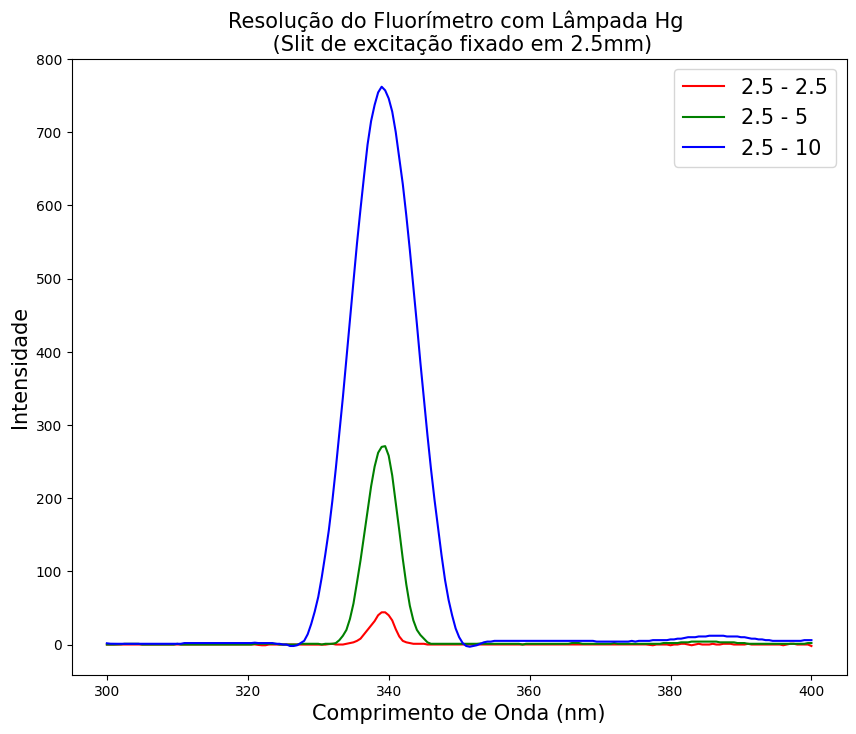

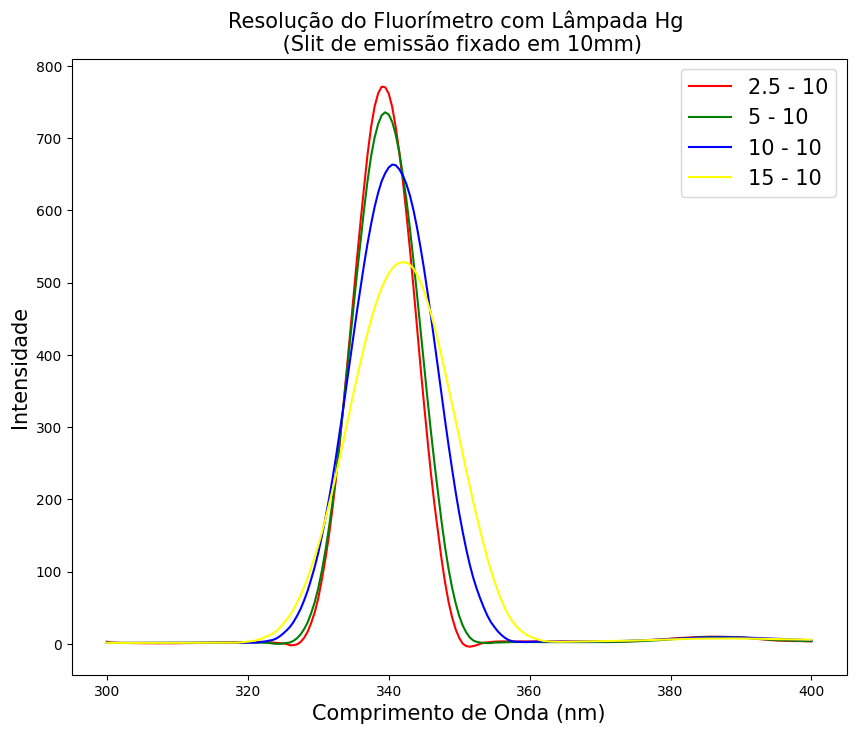

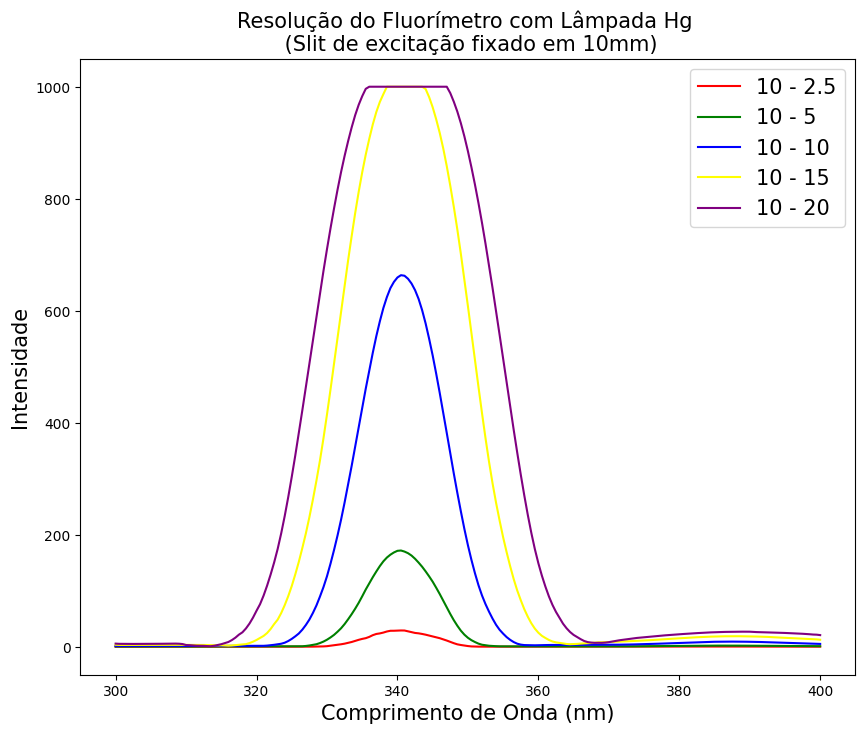

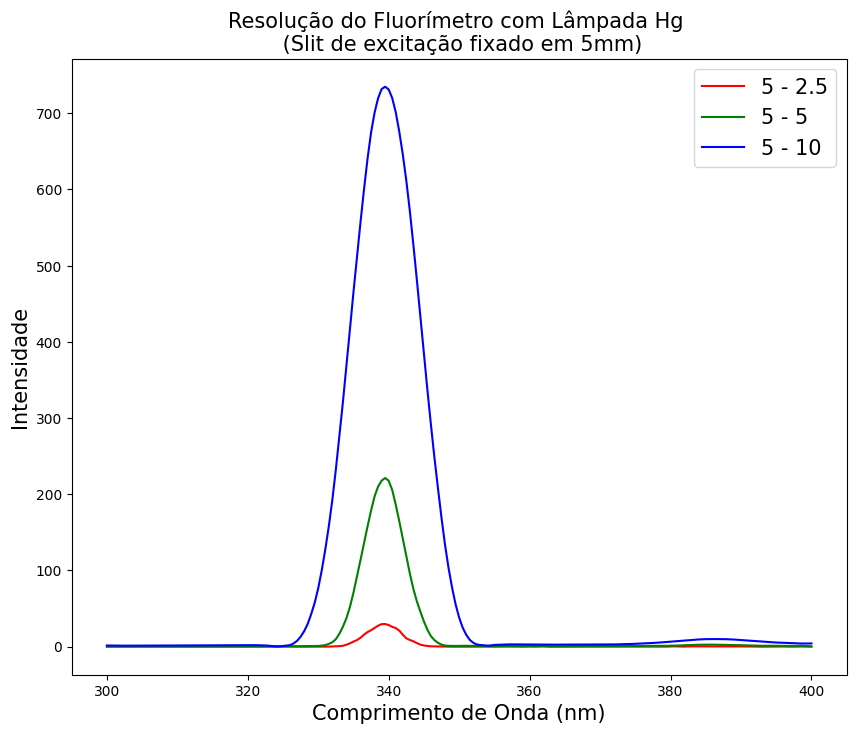

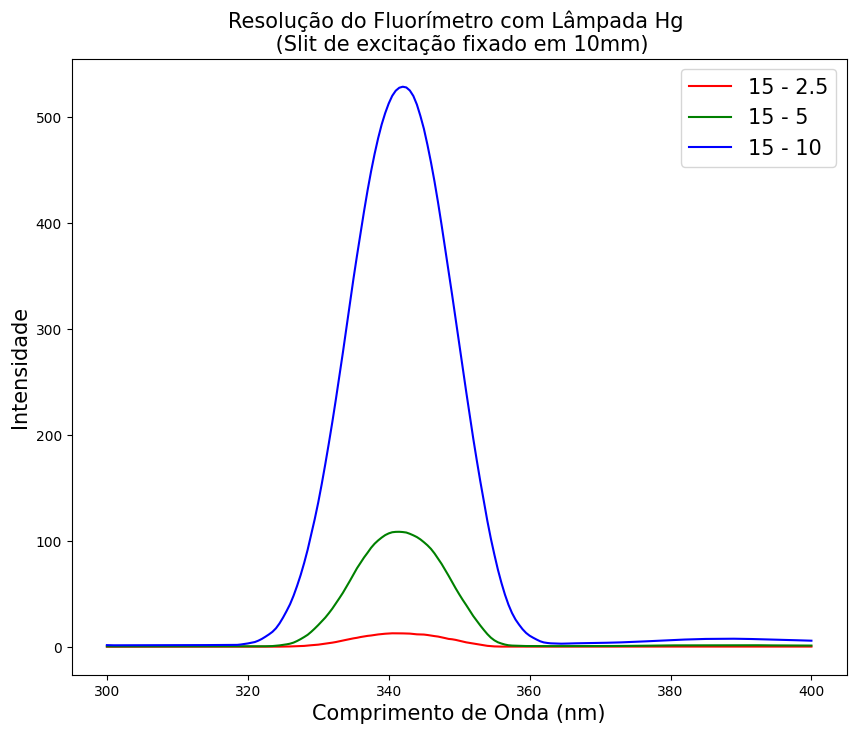

In [6]:
plt.figure(figsize=(10,8))
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(1) 2.5-2.5"], c="r", label="2.5 - 2.5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(1) 2.5-5"], c="g", label="2.5 - 5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(1) 2.5-10"], c="b", label="2.5 - 10")
plt.title("Resolução do Fluorímetro com Lâmpada Hg \n (Slit de excitação fixado em 2.5mm)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.legend(fontsize=15)
plt.show()


plt.figure(figsize=(10,8))
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(2) 2.5-10"], c="r", label="2.5 - 10")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(2) 5-10"], c="g", label="5 - 10")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(2) 10-10"], c="b", label="10 - 10")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(2) 15-10"], c="yellow", label="15 - 10")
plt.title("Resolução do Fluorímetro com Lâmpada Hg \n (Slit de emissão fixado em 10mm)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(3) 10-2.5"], c="r", label="10 - 2.5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(3) 10-5"], c="g", label="10 - 5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(3) 10-10"], c="b", label="10 - 10")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(3) 10-15"], c="yellow", label="10 - 15")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(3) 10-20"], c="purple", label="10 - 20")
plt.title("Resolução do Fluorímetro com Lâmpada Hg \n (Slit de excitação fixado em 10mm)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(4) 5-2.5"], c="r", label="5 - 2.5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(4) 5-5"], c="g", label="5 - 5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(4) 5-10"], c="b", label="5 - 10")
plt.title("Resolução do Fluorímetro com Lâmpada Hg \n (Slit de excitação fixado em 5mm)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(5) 15-2.5"], c="r", label="15 - 2.5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(5) 15-5"], c="g", label="15 - 5")
plt.plot(df_fluor["comprimento de onda (nm)"], df_fluor["(5) 15-10"], c="b", label="15 - 10")
plt.title("Resolução do Fluorímetro com Lâmpada Hg \n (Slit de excitação fixado em 10mm)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.legend(fontsize=15)
plt.show()

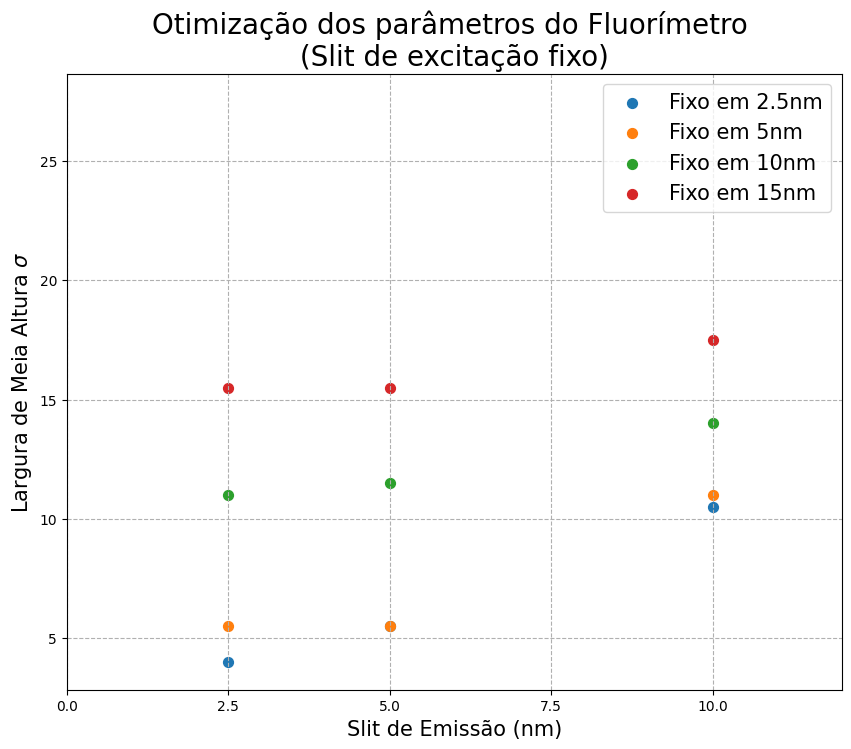

In [7]:
# Cálculo da largura a meia altura fixando a excitação

largura_1 = [4, 5.5, 10.5]
largura_2 = [10.5, 11, 14, 17.5]
largura_3 = [11, 11.5, 14, 20, 27.5]
largura_4 = [5.5, 5.5, 11]
largura_5 = [15.5, 15.5, 17.5]
altura = []

for i in range(1, df_fluor.shape[1]):
  coluna = df_fluor.columns[i]
  altura.append(max(df_fluor[coluna]))

altura_1 = altura[0:3]
altura_2 = altura[3:7]
altura_3 = altura[7:12]
altura_4 = altura[12:15]
altura_5 = altura[15:18]

eixo_x_1 = [2.5, 5, 10]
eixo_x_3 = [2.5, 5, 10, 15, 20]
eixo_x_4 = [2.5, 5, 10]
eixo_x_5 = [2.5, 5, 10]

plt.figure(figsize=(10,8))
plt.grid(True, linestyle="--" )
plt.scatter(x=eixo_x_1, y=largura_1, label="Fixo em 2.5nm", s=50)
plt.scatter(x=eixo_x_4, y=largura_4, label="Fixo em 5nm", s=50)
plt.scatter(x=eixo_x_3, y=largura_3, label="Fixo em 10nm", s=50)
plt.scatter(x=eixo_x_5, y=largura_5, label="Fixo em 15nm", s=50)
plt.legend(fontsize=15)
plt.title("Otimização dos parâmetros do Fluorímetro \n (Slit de excitação fixo) ", fontsize=20)
plt.xlabel("Slit de Emissão (nm)", fontsize=15)
plt.ylabel(r"Largura de Meia Altura $\sigma$", fontsize=15 )
plt.xlim((0,12))
plt.xticks(np.arange(0, 12, step=2.5))
plt.show()

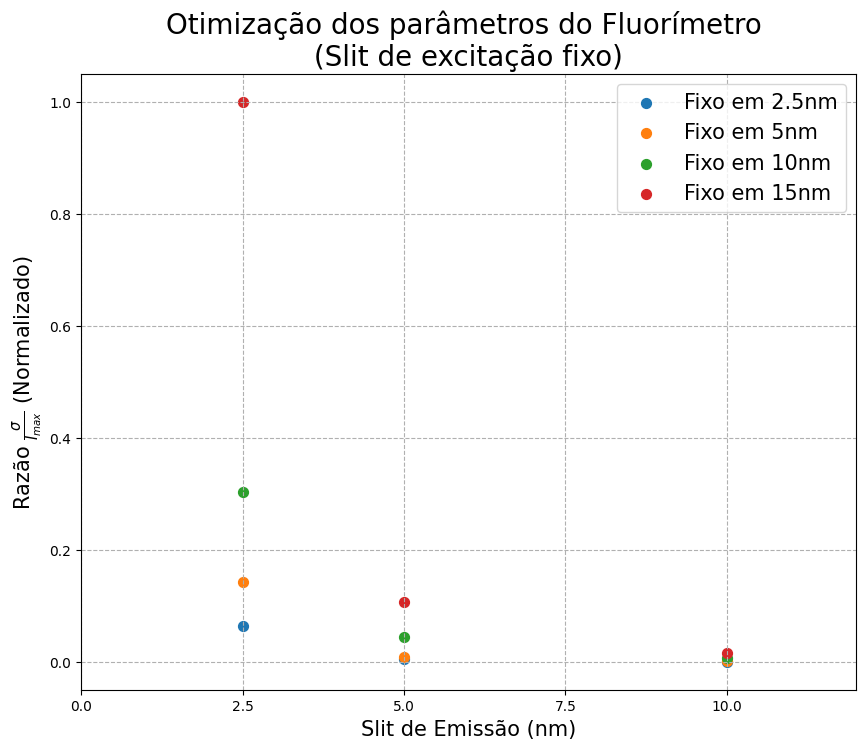

In [8]:
# Cálculo de meia altura relativa a intensidade maxima da configuração


indice_1 = [largura_1[i]/altura_1[i] for i in range(0,3)]
indice_3 = [largura_3[i]/altura_3[i] for i in range(0,5)]
indice_4 = [largura_4[i]/altura_4[i] for i in range(0,3)]
indice_5 = [largura_5[i]/altura_5[i] for i in range(0,3)]

max_1, max_3, max_4, max_5 = max(indice_1), max(indice_3), max(indice_4), max(indice_5)
min_1, min_3, min_4, min_5 = min(indice_1), min(indice_3), min(indice_4), min(indice_5)

maxs = [max_1, max_3, max_4, max_5]
mins = [min_1, min_3, min_4, min_5]

indice_1_n = [(indice_1[i] - min(mins))/(max(maxs) - min(mins)) for i in range(0,3)]
indice_3_n = [(indice_3[i] - min(mins))/(max(maxs) - min(mins)) for i in range(0,5)]
indice_4_n = [(indice_4[i] - min(mins))/(max(maxs) - min(mins)) for i in range(0,3)]
indice_5_n = [(indice_5[i] - min(mins))/(max(maxs) - min(mins)) for i in range(0,3)]

plt.figure(figsize=(10,8))
plt.grid(True, linestyle="--" )
plt.scatter(x=eixo_x_1, y=indice_1_n, label="Fixo em 2.5nm", s=50)
plt.scatter(x=eixo_x_4, y=indice_4_n, label="Fixo em 5nm", s=50)
plt.scatter(x=eixo_x_3, y=indice_3_n, label="Fixo em 10nm", s=50)
plt.scatter(x=eixo_x_5, y=indice_5_n, label="Fixo em 15nm", s=50)
plt.legend(fontsize=15)
plt.title("Otimização dos parâmetros do Fluorímetro \n (Slit de excitação fixo) ", fontsize=20)
plt.xlabel("Slit de Emissão (nm)", fontsize=15)
plt.ylabel(r"Razão $\frac{\sigma}{I_{max}}$ (Normalizado)", fontsize=15 )
plt.xlim(0,12)
plt.xticks(np.arange(0, 12.5, step=2.5))
plt.show()

In [9]:
##Primeiro experimento
df3 = pd.read_csv("Dados_aguapia.csv", header=0)
df4 = pd.read_csv("Dados_aguapia1.csv")
df5 = pd.read_csv("dados_pia_raman_1.csv")
df6 = pd.read_csv("dados_pia_raman_2.csv")

#Segundo experimento

df7 = pd.read_csv("agua_pia_2.csv")

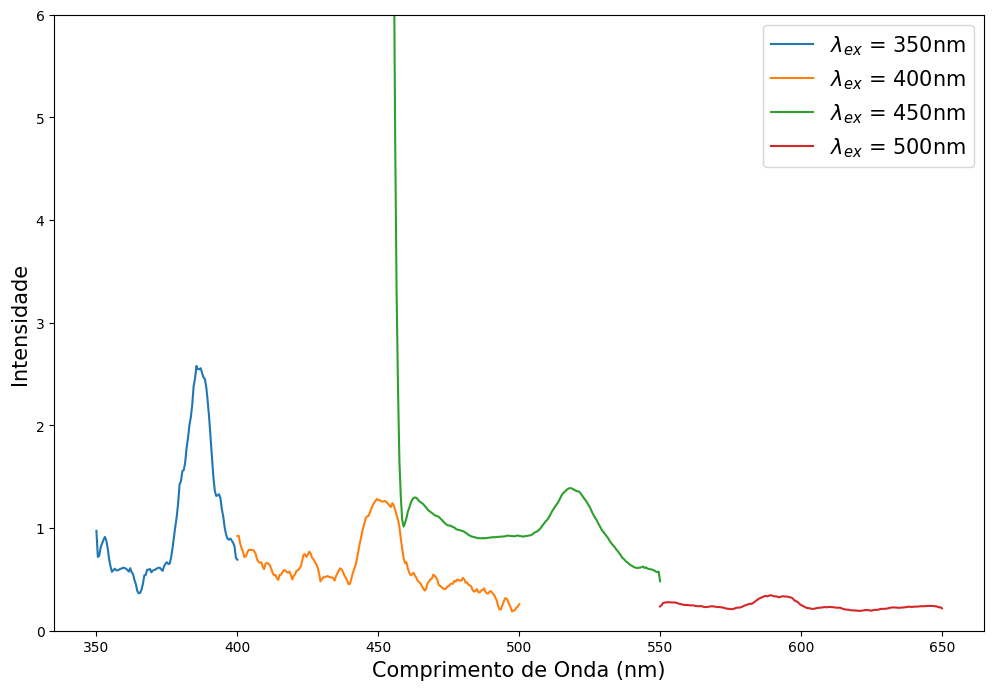

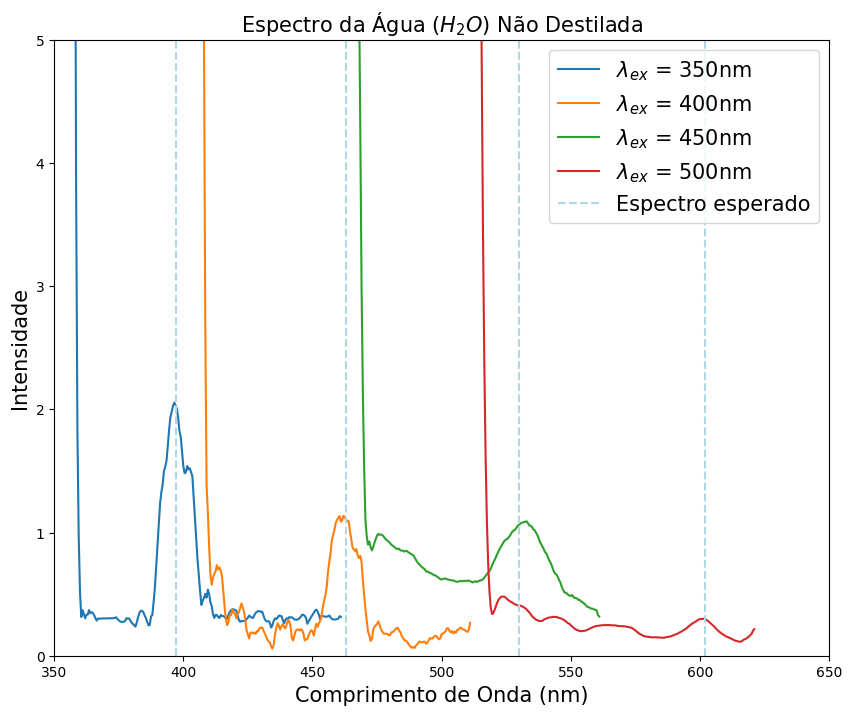

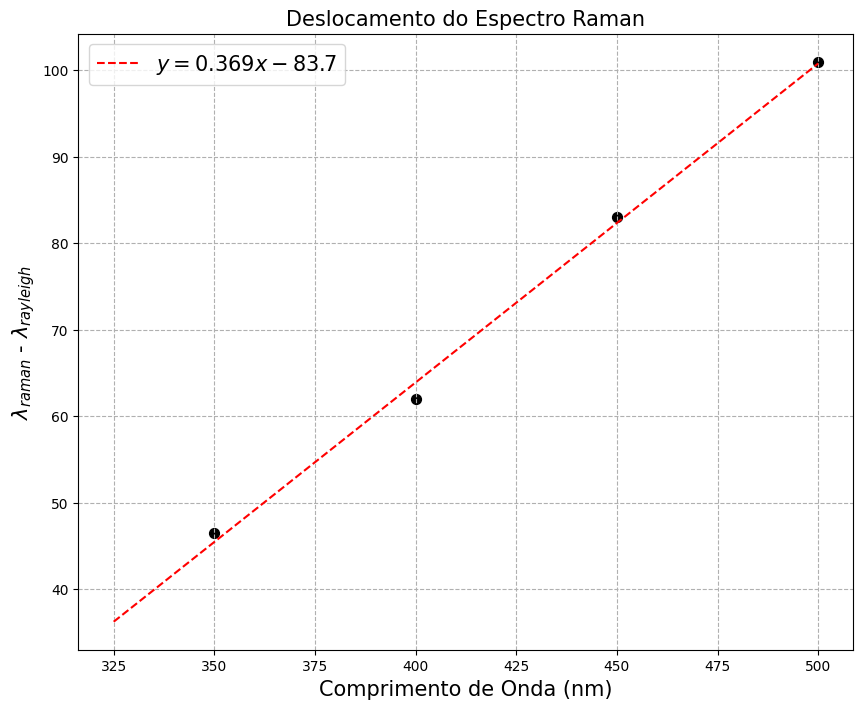

In [10]:
#Espectro do comprimento de onda da agua da pia 1

plt.figure(figsize=(12,8))
plt.plot(df4["(1)comp"], df4["(1)5-5"], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df3["(2)comp"], df3["(2)5-5"], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df3["(3comp"], df3["(3)10-10"], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df3["(4)comp"], df3["(4)10-10"], label=r'$\lambda_{ex}$ = 500nm')
plt.legend(fontsize=15)
plt.title("", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.ylim((0,6))
plt.show()

#Espectro do comprimento de onda da agua da pia 2

x_esperado = [397, 463, 530, 602]
plt.figure(figsize=(10,8))
plt.plot(df7["(1)comp_ajuste"], df7['v_350_5-5'], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df7["(2)comp_ajuste"], df7['v_400_5-5'], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df7["(3)comp_ajuste"], df7['v_450_10-10'], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df7["(4)comp_ajuste"], df7['v_500_10-10'], label=r'$\lambda_{ex}$ = 500nm')
plt.axvline(x=x_esperado[0], ymin=0, ymax=2, c="lightblue", linestyle="--", label="Espectro esperado")
plt.axvline(x=x_esperado[1], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.axvline(x=x_esperado[2], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.axvline(x=x_esperado[3], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.title(r"Espectro da Água $(H_2O)$ Não Destilada", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.ylim((0,5))
plt.xlim((350,650))
plt.legend(fontsize=15)
plt.show()

x = np.linspace(325, 500, 20)
x_picos = [396.5, 462, 533, 601]
x_rayleigh = [350, 400, 450, 500]
dif = []
for i in range(0,4):
  dif.append(x_picos[i]-x_rayleigh[i])

#Regressão

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
dif2 = np.array(dif)
x_rayleigh2 = np.array(x_rayleigh).reshape(-1,1)
model = lr.fit(x_rayleigh2, dif2)
x = np.array(x).reshape(-1,1)
y = model.predict(x)

#Plot
plt.figure(figsize=(10,8))
plt.scatter(x=x_rayleigh, y=dif, s=50, c="black")
plt.plot(x,y, linestyle="--", c='r', label=r'$y = 0.369x - 83.7$')
plt.grid(True, linestyle="--")
plt.xlabel("Comprimento de Onda (nm)", fontsize=15)
plt.ylabel(r"$\lambda_{raman}$ - $\lambda_{rayleigh}$", fontsize=15)
plt.title("Deslocamento do Espectro Raman", fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [11]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [12]:
df7.head()

,(1)comp,(1)comp_ajuste,(1)raman,v_350_5-5,p_350_5-5,(2)comp,(2)comp_ajuste,(2)raman,v_400_5-5,p_400_5-5,(3)comp,(3)comp_ajuste,(3)raman,v_450_10-10,p_450_10-10,(4)comp,(4)comp_ajuste,(4)raman,v_500_10-10,p_500_10-10
0,339.0,350.0,0.000000,168.8603,497.8102,389.0,400.0,0.000000,282.4600,606.8768,439.0,450.0,0.000000,424.8583,970.8944,489.0,500.0,0.000000,220.7909,661.1235
1,339.5,350.5,40.758101,172.5914,502.3860,389.5,400.5,31.210986,275.0251,592.0800,439.5,450.5,24.663954,432.7072,987.6123,489.5,500.5,19.980020,222.0448,661.6854
2,340.0,351.0,81.400081,171.3256,493.1243,390.0,401.0,62.344140,262.2870,569.5379,440.0,451.0,49.273220,437.4782,998.0435,490.0,501.0,39.920160,221.7596,657.4815
3,340.5,351.5,121.926438,163.6001,467.0891,390.5,401.5,93.399751,244.4816,530.8038,440.5,451.5,73.827981,439.1484,999.9990,490.5,501.5,59.820538,219.9478,648.3794
4,341.0,352.0,162.337662,151.6106,429.1693,391.0,402.0,124.378109,220.5684,472.4914,441.0,452.0,98.328417,437.3284,998.1277,491.0,502.0,79.681275,216.5940,634.7421


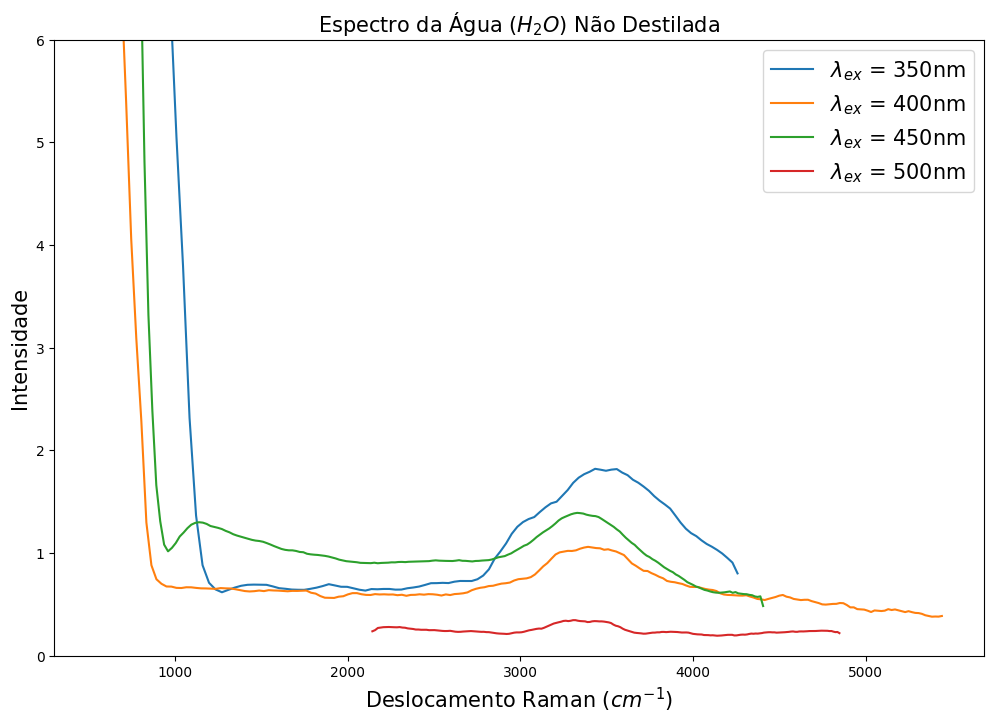

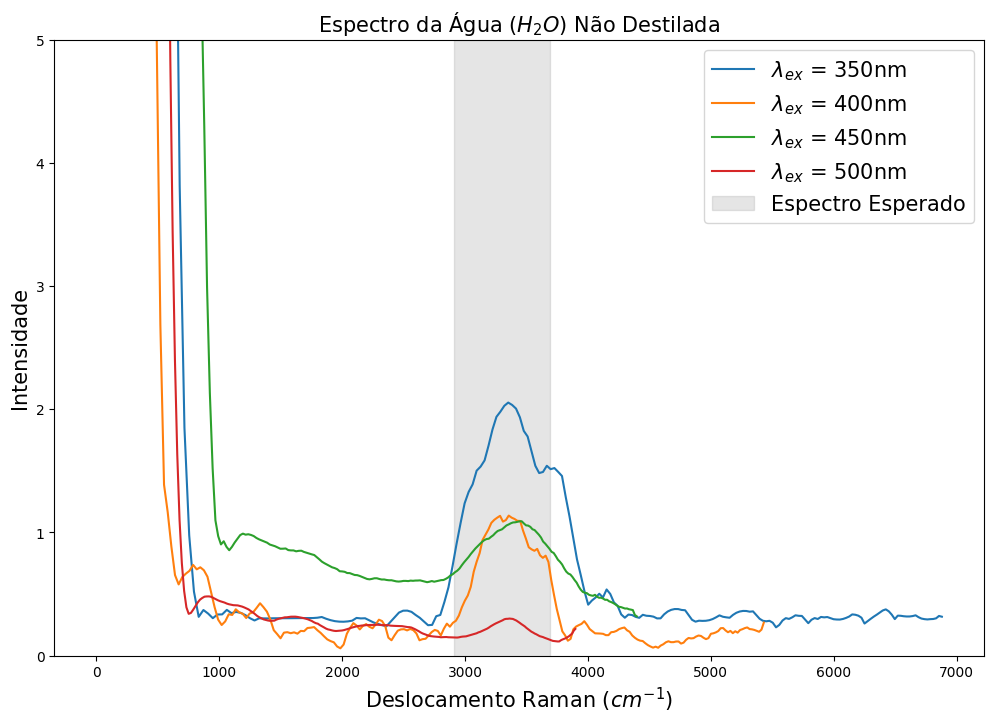

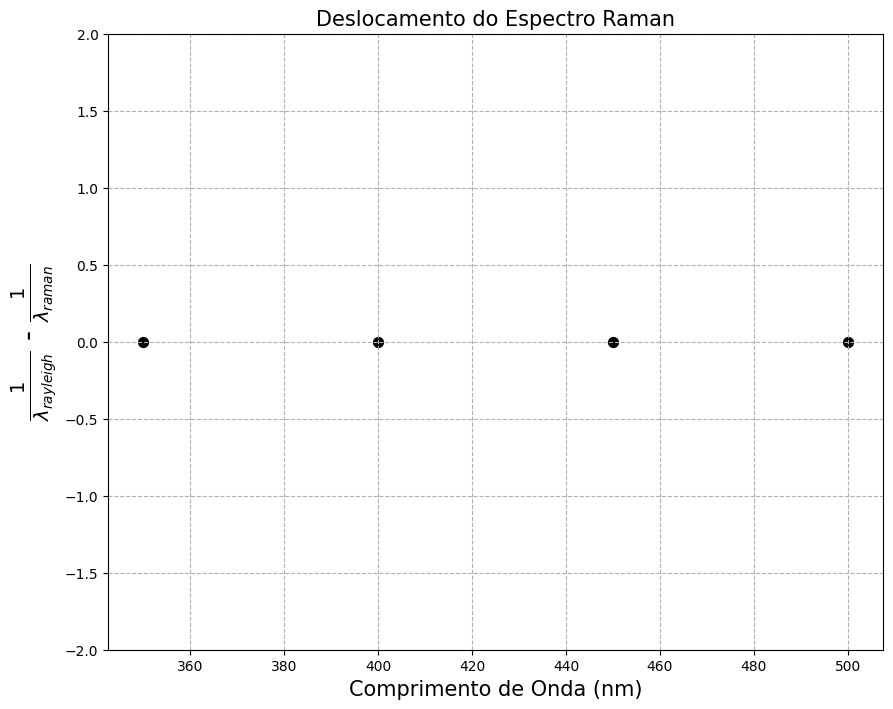

In [13]:
#Espectro Raman do primeiro experimento

plt.figure(figsize=(12,8))
plt.plot(df5["(1)comp_raman"], df5["(1)10-5"], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df6["(2)comp_raman"], df6["(2)10-5"], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df6["(3)comp_raman"], df6["(3)10-10"], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df6["(4)comp_raman"], df6["(4)10-10"], label=r'$\lambda_{ex}$ = 500nm')
plt.legend(fontsize=15)
plt.title(r"Espectro da Água $(H_2O)$ Não Destilada", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r"Deslocamento Raman $(cm^{-1})$",fontsize=15 )
plt.ylim((0,6))
plt.show()

plt.figure(figsize=(12,8))
plt.plot(df7["(1)raman"], df7["v_350_5-5"], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df7["(2)raman"], df7["v_400_5-5"], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df7["(3)raman"], df7["v_450_10-10"], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df7["(4)raman"], df7["v_500_10-10"], label=r'$\lambda_{ex}$ = 500nm')
plt.fill_between(df7["(4)raman"], -1, 5, where=(df7["(4)raman"]>=2900) & (df7["(4)raman"]<=3700), color='gray', alpha=0.2, label='Espectro Esperado')
plt.legend(fontsize=15)
plt.title(r"Espectro da Água $(H_2O)$ Não Destilada", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r"Deslocamento Raman $(cm^{-1})$",fontsize=15 )
plt.ylim((0,5))
plt.show()

dif2 = []
for i in range(0,4):
  a = ((1/x_rayleigh[i]))
  b = ((1/x_picos[i]))
  dif2.append(a - b)
plt.figure(figsize=(10,8))
plt.scatter(x=x_rayleigh, y=dif2, s=50, c="black")
plt.grid(True, linestyle="--")
plt.xlabel("Comprimento de Onda (nm)", fontsize=15)
plt.ylabel(r"$\frac{1}{\lambda_{rayleigh}}$ - $\frac{1}{\lambda_{raman}}$", fontsize=20)
plt.title("Deslocamento do Espectro Raman", fontsize=15)
plt.ylim((-2,2))
plt.show()






In [14]:
df_h2o = pd.read_csv("Simetria(1).csv")
df_h2o.head()

,(1)comp,(1)comp_ajuste,(1)raman,v_350_5-5,p_350_5-5
0,372.5,383.5,2495.809275,0.3639,1.1454
1,373.0,384.0,2529.761905,0.3645,1.1656
2,373.5,384.5,2563.626231,0.3544,1.2380
3,374.0,385.0,2597.402597,0.3291,1.3379
4,374.5,385.5,2631.091347,0.3063,1.3777


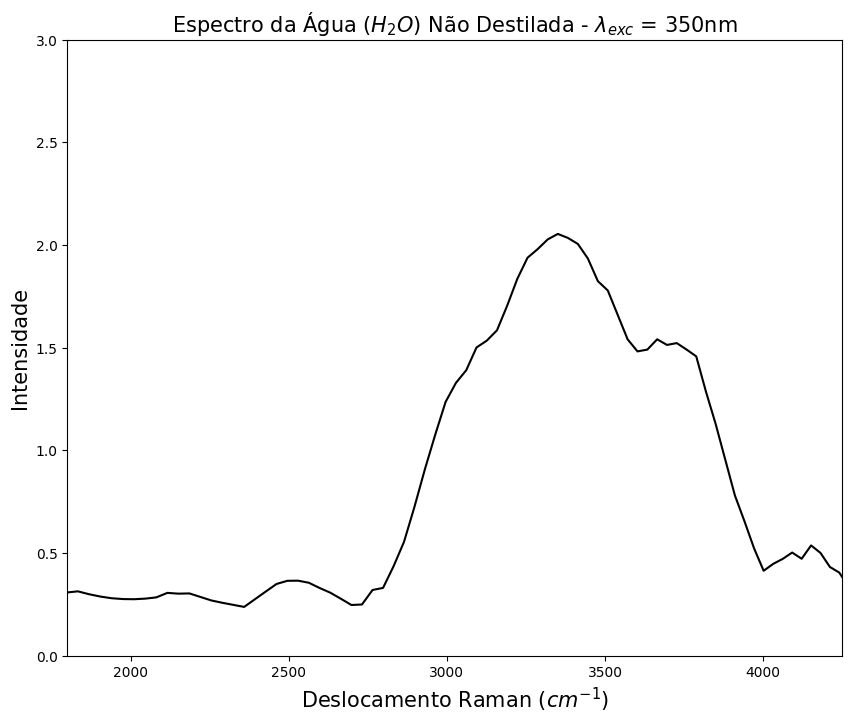

In [15]:
# Estudo das simetrias

plt.figure(figsize=(10,8))
plt.plot(df7["(1)raman"], df7["v_350_5-5"], c="black")
plt.xlim((1800, 4250))
plt.ylim((0,3))
plt.ylabel("Intensidade", fontsize=15)
plt.title(r"Espectro da Água $(H_2O)$ Não Destilada - $\lambda_{exc}$ = 350nm", fontsize=15)
plt.xlabel(r"Deslocamento Raman $(cm^{-1})$", fontsize=15)
plt.show()

In [16]:
df7.head()

,(1)comp,(1)comp_ajuste,(1)raman,v_350_5-5,p_350_5-5,(2)comp,(2)comp_ajuste,(2)raman,v_400_5-5,p_400_5-5,(3)comp,(3)comp_ajuste,(3)raman,v_450_10-10,p_450_10-10,(4)comp,(4)comp_ajuste,(4)raman,v_500_10-10,p_500_10-10
0,339.0,350.0,0.000000,168.8603,497.8102,389.0,400.0,0.000000,282.4600,606.8768,439.0,450.0,0.000000,424.8583,970.8944,489.0,500.0,0.000000,220.7909,661.1235
1,339.5,350.5,40.758101,172.5914,502.3860,389.5,400.5,31.210986,275.0251,592.0800,439.5,450.5,24.663954,432.7072,987.6123,489.5,500.5,19.980020,222.0448,661.6854
2,340.0,351.0,81.400081,171.3256,493.1243,390.0,401.0,62.344140,262.2870,569.5379,440.0,451.0,49.273220,437.4782,998.0435,490.0,501.0,39.920160,221.7596,657.4815
3,340.5,351.5,121.926438,163.6001,467.0891,390.5,401.5,93.399751,244.4816,530.8038,440.5,451.5,73.827981,439.1484,999.9990,490.5,501.5,59.820538,219.9478,648.3794
4,341.0,352.0,162.337662,151.6106,429.1693,391.0,402.0,124.378109,220.5684,472.4914,441.0,452.0,98.328417,437.3284,998.1277,491.0,502.0,79.681275,216.5940,634.7421


In [17]:
df_cub = pd.read_csv("cubeta_vazia.csv", header=0)
df_cub.head()

,comp,int (ex 250 vidro),int (ex 250 plast),int (ex 300 vidro),int (ex 300 plast)
0,200.0,0.5070,0.3420,0.1250,4.1450
1,200.5,0.3461,0.3850,0.1850,4.2314
2,201.0,0.3494,0.3541,0.2037,4.2217
3,201.5,0.3590,0.3967,0.1959,4.2490
4,202.0,0.4038,0.3762,0.1880,4.2387


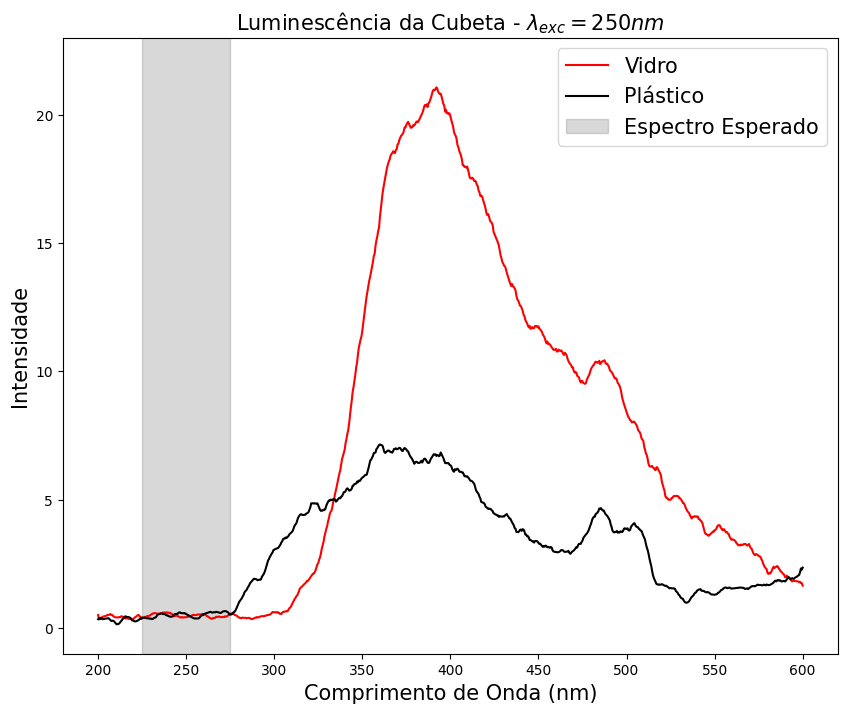

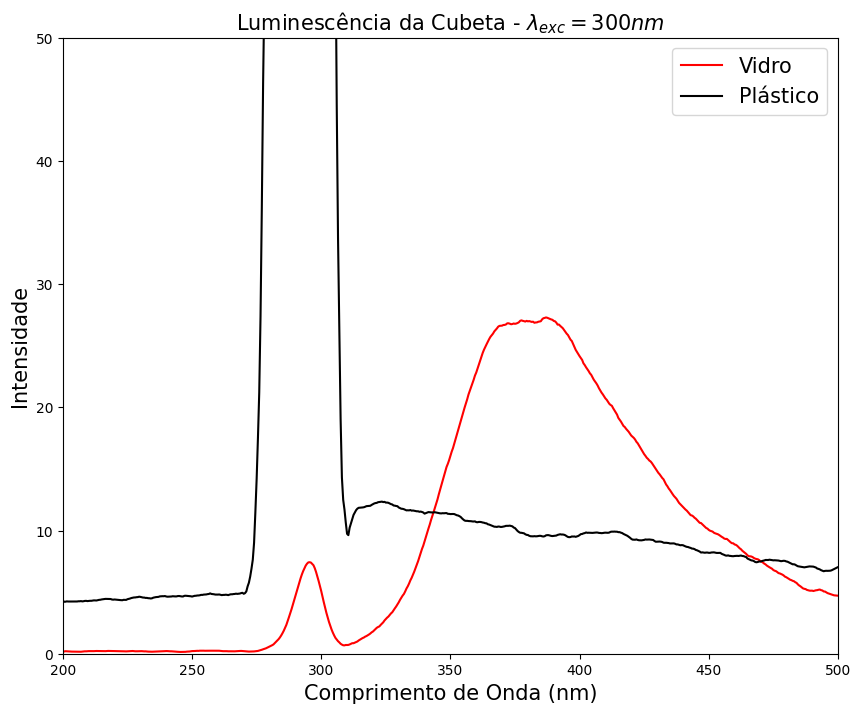

In [18]:
plt.figure(figsize=(10,8))
plt.plot(df_cub["comp"], df_cub["int (ex 250 vidro)"], c="red", label="Vidro")
plt.plot(df_cub["comp"], df_cub["int (ex 250 plast)"], c="black", label="Plástico")
plt.fill_between(df_cub["comp"], -1, 25, where=(df_cub["comp"] >= 225) & (df_cub["comp"]  <= 275), color='gray', alpha=0.3, label='Espectro Esperado')
plt.title(r'Luminescência da Cubeta - $\lambda_{exc} = 250 nm$', fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.ylim((-1, 23))
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df_cub["comp"], df_cub["int (ex 300 vidro)"], c="red", label="Vidro")
plt.plot(df_cub["comp"], df_cub["int (ex 300 plast)"], c="black", label="Plástico")
plt.title(r'Luminescência da Cubeta - $\lambda_{exc} = 300 nm$', fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.ylim(0,50)
plt.xlim(200,500)
plt.legend(fontsize=15)
plt.show()

In [19]:
df_ace = pd.read_csv("acetona.csv", header=0)
df_ace.head()

,comp (1),comp_corrected (1),raman_shift (1),int (ex 350 5-5),int(ex 350 10-10),comp (2),comp_corrected (2),raman_shift (2),int (ex 400 5-5),int(ex 400 10-10)
0,300.0,311.0,-3582.912265,0.2660,1.0190,350.0,361.0,-2700.831025,0.0830,0.8450
1,300.5,311.5,-3531.300161,0.2544,0.9574,350.5,361.5,-2662.517289,0.1274,0.8718
2,301.0,312.0,-3479.853480,0.2399,0.9427,351.0,362.0,-2624.309392,0.1375,0.8749
3,301.5,312.5,-3428.571429,0.2353,0.9430,351.5,362.5,-2586.206897,0.1314,0.8788
4,302.0,313.0,-3377.453218,0.2363,0.9407,352.0,363.0,-2548.209366,0.1381,0.8789


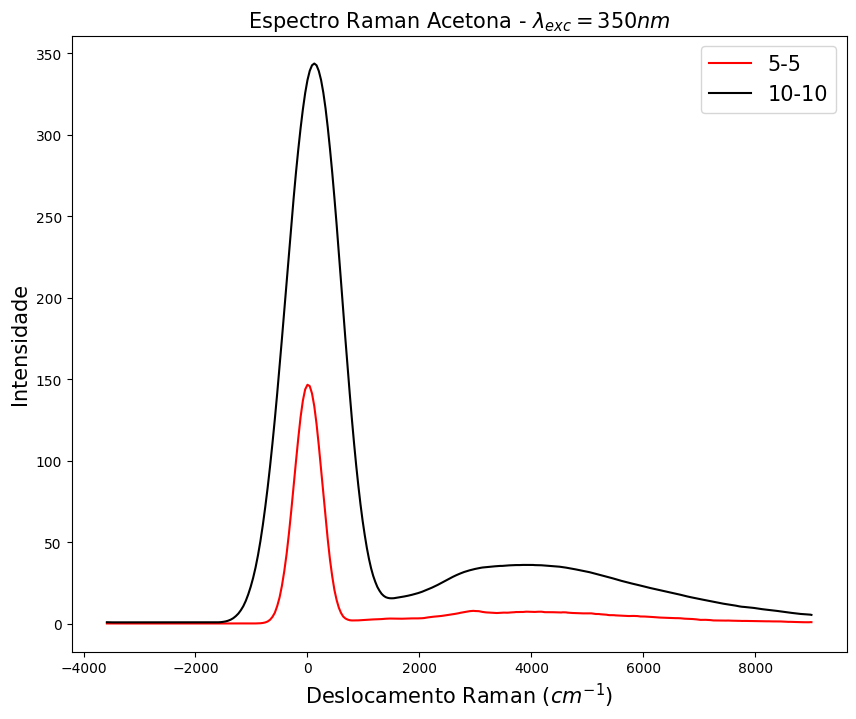

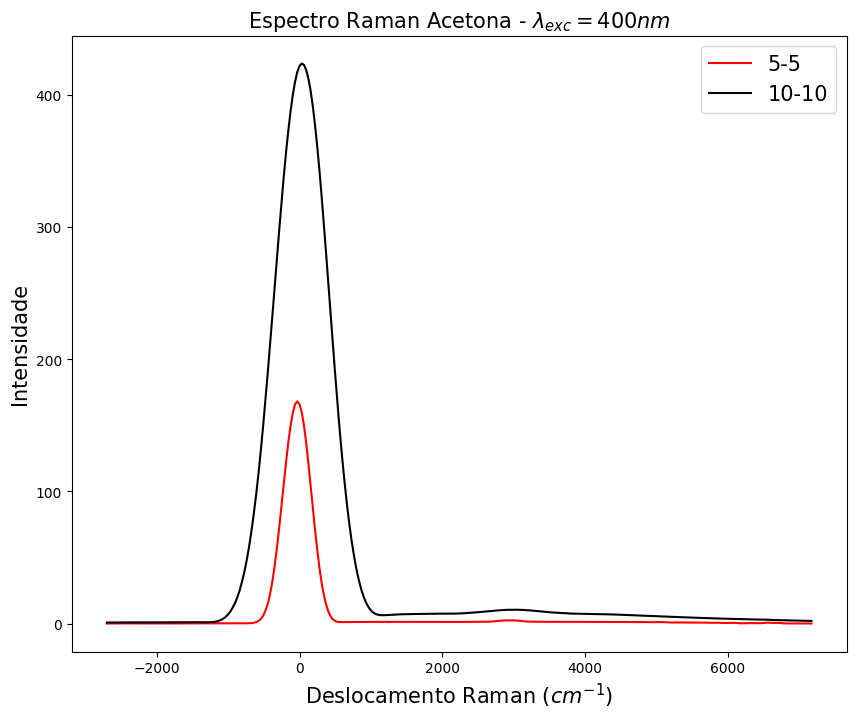

In [20]:
plt.figure(figsize=(10,8))
plt.plot(df_ace["raman_shift (1)"], df_ace['int (ex 350  5-5)'], c="red", label="5-5")
plt.plot(df_ace["raman_shift (1)"], df_ace['int(ex 350 10-10)'], c="black", label="10-10")
plt.title(r'Espectro Raman Acetona - $\lambda_{exc} = 350 nm$', fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r'Deslocamento Raman ($cm^{-1}$)',fontsize=15 )
#plt.xlim(2000,6000)
#plt.ylim(0,50)
plt.legend(fontsize=15)
plt.show()


plt.figure(figsize=(10,8))
plt.plot(df_ace["raman_shift (2)"], df_ace['int (ex 400  5-5)'], c="red", label="5-5")
plt.plot(df_ace["raman_shift (2)"], df_ace['int(ex 400 10-10)'], c="black", label="10-10")
plt.title(r'Espectro Raman Acetona - $\lambda_{exc} = 400 nm$', fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r'Deslocamento Raman ($cm^{-1}$)',fontsize=15 )
#plt.xlim(2000,4000)
#plt.ylim(0,50)
plt.legend(fontsize=15)
plt.show()

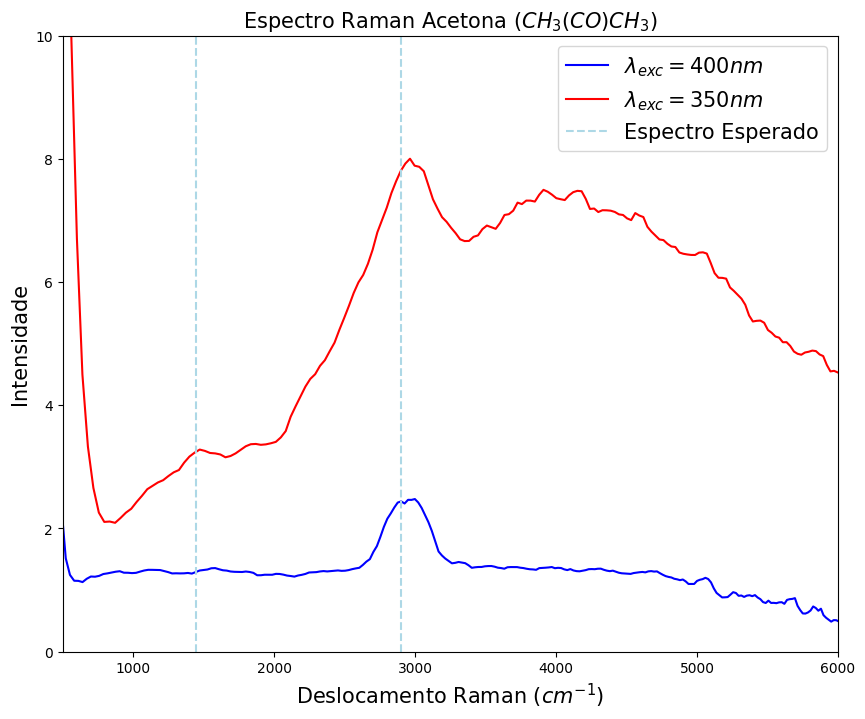

In [21]:
plt.figure(figsize=(10,8))
plt.plot(df_ace["raman_shift (2)"], df_ace['int (ex 400  5-5)'], c="blue", label="$\lambda_{exc} = 400 nm$")
plt.plot(df_ace["raman_shift (1)"], df_ace['int (ex 350  5-5)'], c="red", label="$\lambda_{exc} = 350 nm$")
plt.axvline(x=2900, ymin=0, ymax=10, linestyle="--", c='lightblue', label='Espectro Esperado')
plt.axvline(x=1448, ymin=0, ymax=10, linestyle="--", c='lightblue')
plt.title(r'Espectro Raman Acetona $(CH_3(CO)CH_3)$', fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r'Deslocamento Raman ($cm^{-1}$)',fontsize=15 )
plt.xlim(500,6000)
plt.ylim(0,10)
plt.legend(fontsize=15)
plt.show()

In [22]:
df_dest2 = pd.read_csv("agua_dest.csv")
df_dest2.head()

,comp(1),comp_corrected(1),raman_shift(1),vidro(ex 350 5-5),plastico(ex 350 5-5),comp(2),comp_corrected(2),raman_shift(2),vidro(ex 400 5-5),plastico(ex 400 5-5),comp(3),comp_corrected(3),raman_shift(3),vidro(ex 450 10-10),plastico(ex 450 10-10),comp(4),comp_corrected(4),raman_shift(4),vidro(ex 500 10-10),plastico(ex 500 10-10)
0,339.0,350.0,0.000000,97.2373,689.7720,389.0,400.0,0.000000,160.6376,573.0379,439.0,450.0,0.000000,232.6589,999.999,489.0,500.0,0.000000,95.0055,638.6647
1,339.5,350.5,40.758101,98.6829,711.2977,389.5,400.5,31.210986,155.4388,554.3844,439.5,450.5,24.663954,236.7248,999.999,489.5,500.5,19.980020,95.6414,652.1910
2,340.0,351.0,81.400081,97.9502,706.2628,390.0,401.0,62.344140,146.7455,523.5177,440.0,451.0,49.273220,239.4390,999.999,490.0,501.0,39.920160,95.6439,661.3013
3,340.5,351.5,121.926438,93.5444,674.4640,390.5,401.5,93.399751,135.1259,481.4519,440.5,451.5,73.827981,240.3277,999.999,490.5,501.5,59.820538,94.9309,665.5814
4,341.0,352.0,162.337662,86.4997,631.3511,391.0,402.0,124.378109,120.9791,431.4435,441.0,452.0,98.328417,239.2257,999.999,491.0,502.0,79.681275,93.5399,664.9199


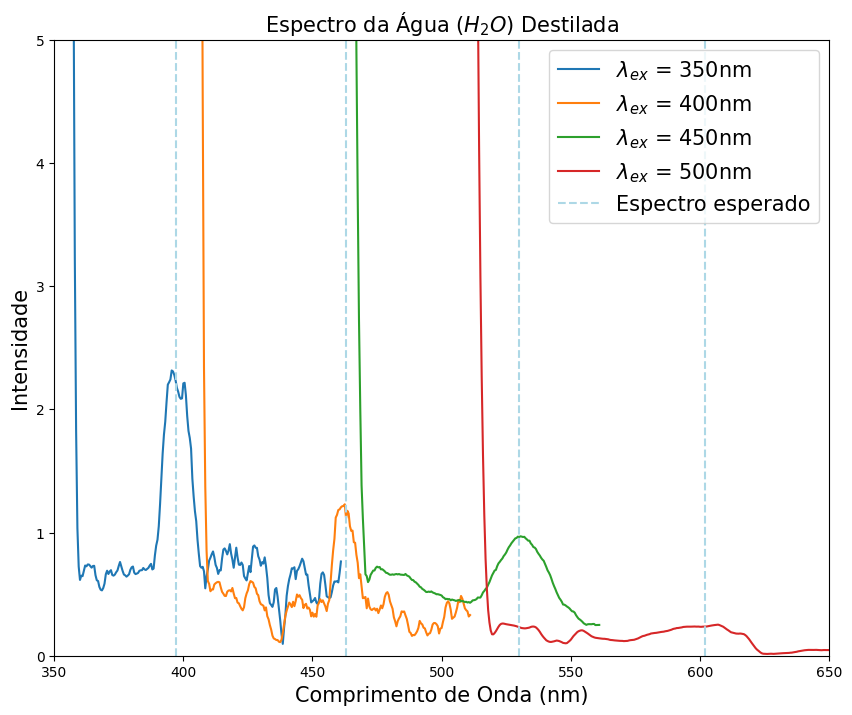

In [23]:
x_esperado = [397, 463, 530, 602]
plt.figure(figsize=(10,8))
plt.plot(df_dest2["comp_corrected(1)"], df_dest2['vidro(ex 350 5-5)'], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df_dest2["comp_corrected(2)"], df_dest2['vidro(ex 400 5-5)'], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df_dest2["comp_corrected(3)"], df_dest2['vidro(ex 450 10-10)'], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df_dest2["comp_corrected(4)"], df_dest2['vidro(ex 500 10-10)'], label=r'$\lambda_{ex}$ = 500nm')
plt.axvline(x=x_esperado[0], ymin=0, ymax=2, c="lightblue", linestyle="--", label="Espectro esperado")
plt.axvline(x=x_esperado[1], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.axvline(x=x_esperado[2], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.axvline(x=x_esperado[3], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.title(r"Espectro da Água $(H_2O)$ Destilada", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.ylim((0,5))
plt.xlim((350,650))
plt.legend(fontsize=15)
plt.show()

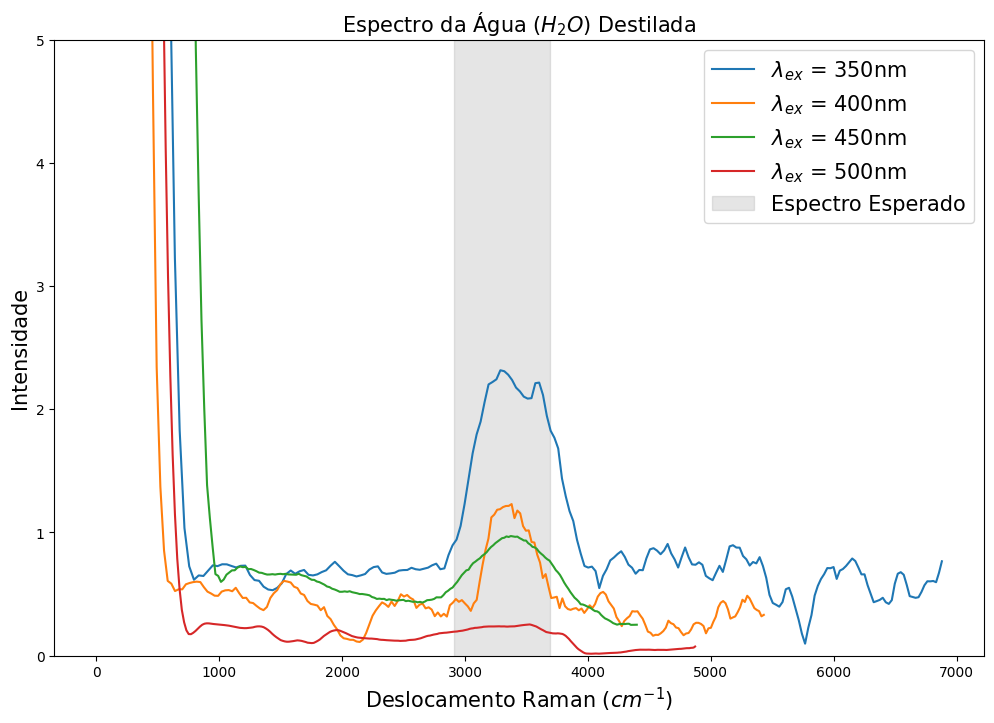

In [24]:
plt.figure(figsize=(12,8))
plt.plot(df_dest2["raman_shift(1)"], df_dest2['vidro(ex 350 5-5)'], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df_dest2["raman_shift(2)"], df_dest2['vidro(ex 400 5-5)'], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df_dest2["raman_shift(3)"], df_dest2['vidro(ex 450 10-10)'], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df_dest2["raman_shift(4)"], df_dest2['vidro(ex 500 10-10)'], label=r'$\lambda_{ex}$ = 500nm')
plt.fill_between(df_dest2["raman_shift(4)"], -1, 5, where=(df_dest2["raman_shift(4)"]>=2900) & (df_dest2["raman_shift(4)"]<=3700), color='gray', alpha=0.2, label='Espectro Esperado')
plt.legend(fontsize=15)
plt.title(r"Espectro da Água $(H_2O)$ Destilada", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r"Deslocamento Raman $(cm^{-1})$",fontsize=15 )
plt.ylim((0,5))
plt.show()

In [25]:
df_sal = pd.read_csv("agua_sal.csv")
df_sal.head()

,comp(1),comp_corrected(1),raman_shift(1),vidro(5-5),comp(2),comp_corrected(2),raman_shift(2),vidro(5-5).1,comp(3),comp_corrected(1).1,raman_shift(3),vidro(10-10),comp(4),comp_corrected(1).2,raman_shift(4),vidro(10-10).1
0,339.0,350.0,0.000000,999.9990,389.0,400.0,0.000000,999.9990,439.0,450.0,0.000000,999.999,489.0,500.0,0.000000,2.9890
1,339.5,350.5,40.758101,999.9990,389.5,400.5,31.210986,999.9990,439.5,450.5,24.663954,999.999,489.5,500.5,19.980020,2.9698
2,340.0,351.0,81.400081,999.9990,390.0,401.0,62.344140,981.5525,440.0,451.0,49.273220,999.999,490.0,501.0,39.920160,2.9531
3,340.5,351.5,121.926438,983.7282,390.5,401.5,93.399751,920.1186,440.5,451.5,73.827981,999.999,490.5,501.5,59.820538,2.9380
4,341.0,352.0,162.337662,944.4404,391.0,402.0,124.378109,828.3879,441.0,452.0,98.328417,999.999,491.0,502.0,79.681275,2.9199


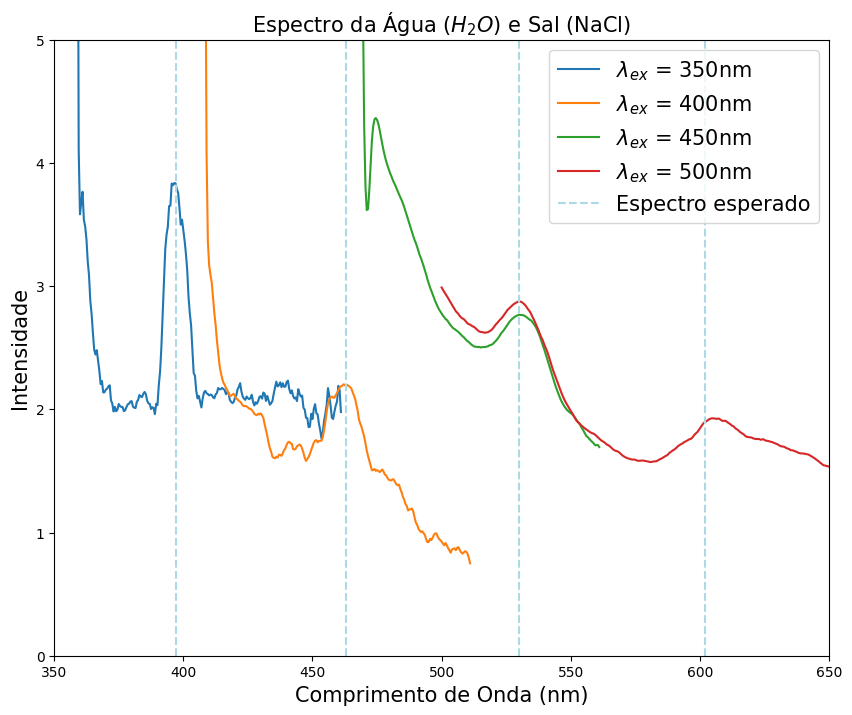

In [26]:
x_esperado = [397, 463, 530, 602]
plt.figure(figsize=(10,8))
plt.plot(df_sal["comp_corrected(1)"], df_sal['vidro(5-5)'], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df_sal["comp_corrected(2)"], df_sal['vidro(5-5).1'], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df_sal["comp_corrected(1).1"], df_sal['vidro(10-10)'], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df_sal["comp_corrected(1).2"], df_sal['vidro(10-10).1'], label=r'$\lambda_{ex}$ = 500nm')
plt.axvline(x=x_esperado[0], ymin=0, ymax=2, c="lightblue", linestyle="--", label="Espectro esperado")
plt.axvline(x=x_esperado[1], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.axvline(x=x_esperado[2], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.axvline(x=x_esperado[3], ymin=0, ymax=2, c="lightblue", linestyle="--")
plt.title(r"Espectro da Água $(H_2O)$ e Sal (NaCl)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel("Comprimento de Onda (nm)",fontsize=15 )
plt.ylim((0,5))
plt.xlim((350,650))
plt.legend(fontsize=15)
plt.show()

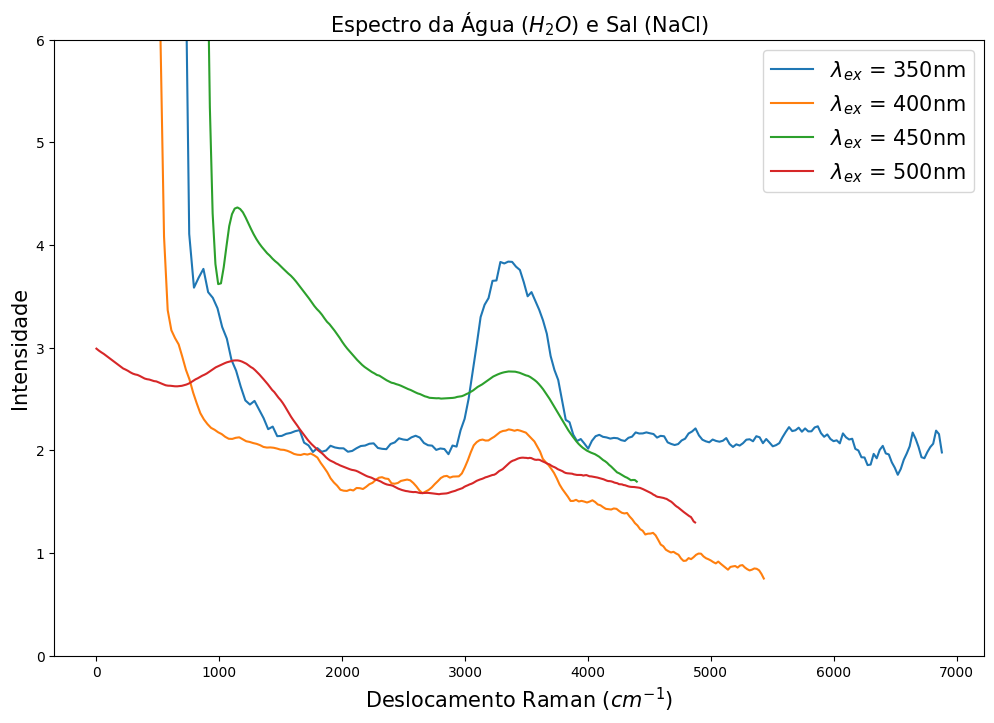

In [27]:
plt.figure(figsize=(12,8))
plt.plot(df_sal["raman_shift(1)"], df_sal['vidro(5-5)'], label=r'$\lambda_{ex}$ = 350nm')
plt.plot(df_sal["raman_shift(2)"], df_sal['vidro(5-5).1'], label=r'$\lambda_{ex}$ = 400nm')
plt.plot(df_sal["raman_shift(3)"], df_sal['vidro(10-10)'], label=r'$\lambda_{ex}$ = 450nm')
plt.plot(df_sal["raman_shift(4)"], df_sal['vidro(10-10).1'], label=r'$\lambda_{ex}$ = 500nm')
plt.legend(fontsize=15)
plt.title(r"Espectro da Água $(H_2O)$ e Sal (NaCl)", fontsize=15)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r"Deslocamento Raman $(cm^{-1})$",fontsize=15 )
plt.ylim((0,6))
plt.show()

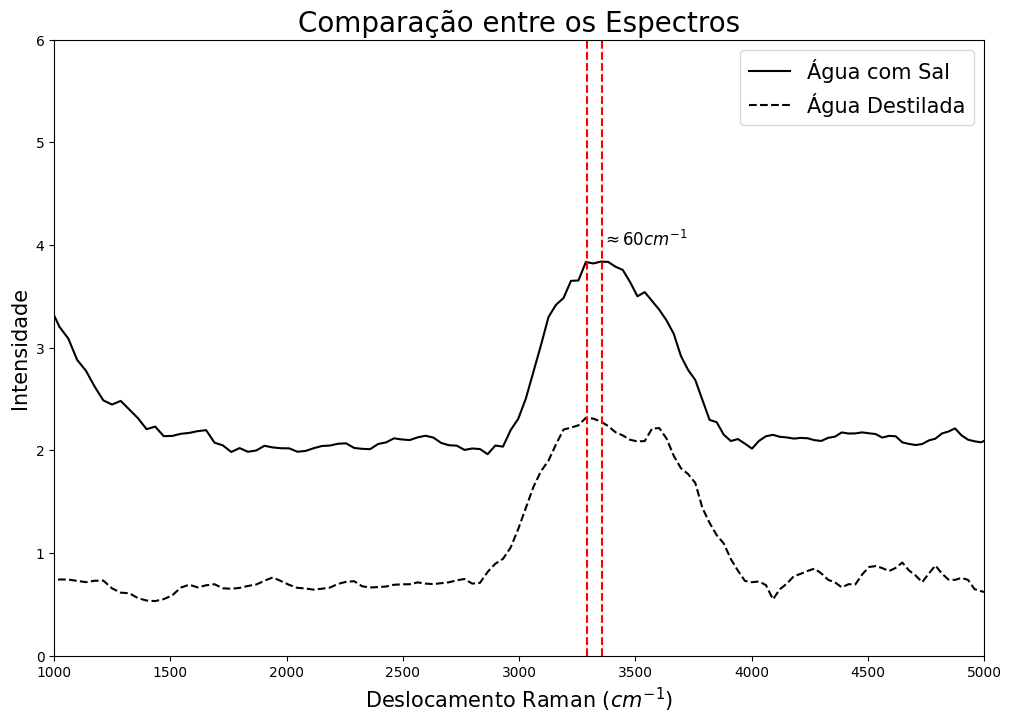

In [28]:
# Comparação água com e sem sal

plt.figure(figsize=(12,8))
plt.plot(df_sal["raman_shift(1)"], df_sal['vidro(5-5)'], label='Água com Sal', c='black')
plt.plot(df_dest2["raman_shift(1)"], df_dest2['vidro(ex 350 5-5)'], label=r'Água Destilada', linestyle="--", c='black')
plt.axvline(x=3290, ymin=0, ymax=2, c="red", linestyle="--")
plt.axvline(x=3355, ymin=0, ymax=2, c="red", linestyle="--")
plt.title("Comparação entre os Espectros", fontsize=20)
plt.text(3355, 4, s=r"$\approx 60cm^{-1}$", fontsize=12)
plt.ylabel("Intensidade", fontsize=15)
plt.xlabel(r"Deslocamento Raman $(cm^{-1})$",fontsize=15 )
plt.ylim((0,6))
plt.xlim(1000,5000)
plt.legend(fontsize=15)
plt.show()